In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [45]:

# Количество точек данных
N = 50

# Создаем исходные данные временных рядов для 3 показателей
data1 = np.random.randn(N)
data2 = np.random.randn(N)
data3 = np.random.randn(N)

# Добавляем сезонность
data1 += 0.5 * np.sin(2 * np.pi * data1 / 12)
data2 += 0.5 * np.sin(2 * np.pi * data2 / 12 + np.pi / 2)
data3 += 0.5 * np.sin(2 * np.pi * data3 / 12 + np.pi)

# Сглаживаем сезонность с помощью скользящей средней
window_size = 3
data1_smoothed = np.convolve(data1, np.ones((window_size,)) / window_size, mode='same')
data2_smoothed = np.convolve(data2, np.ones((window_size,)) / window_size, mode='same')
data3_smoothed = np.convolve(data3, np.ones((window_size,)) / window_size, mode='same')


# Создаем DataFrame из сгенерированных данных
df = pd.DataFrame({
    'data1_sm': data1_smoothed,
    'data2_sm': data2_smoothed,
    'data3_sm': data3_smoothed,
    'data1': data1,
    'data2': data2,
    'data3': data3
})


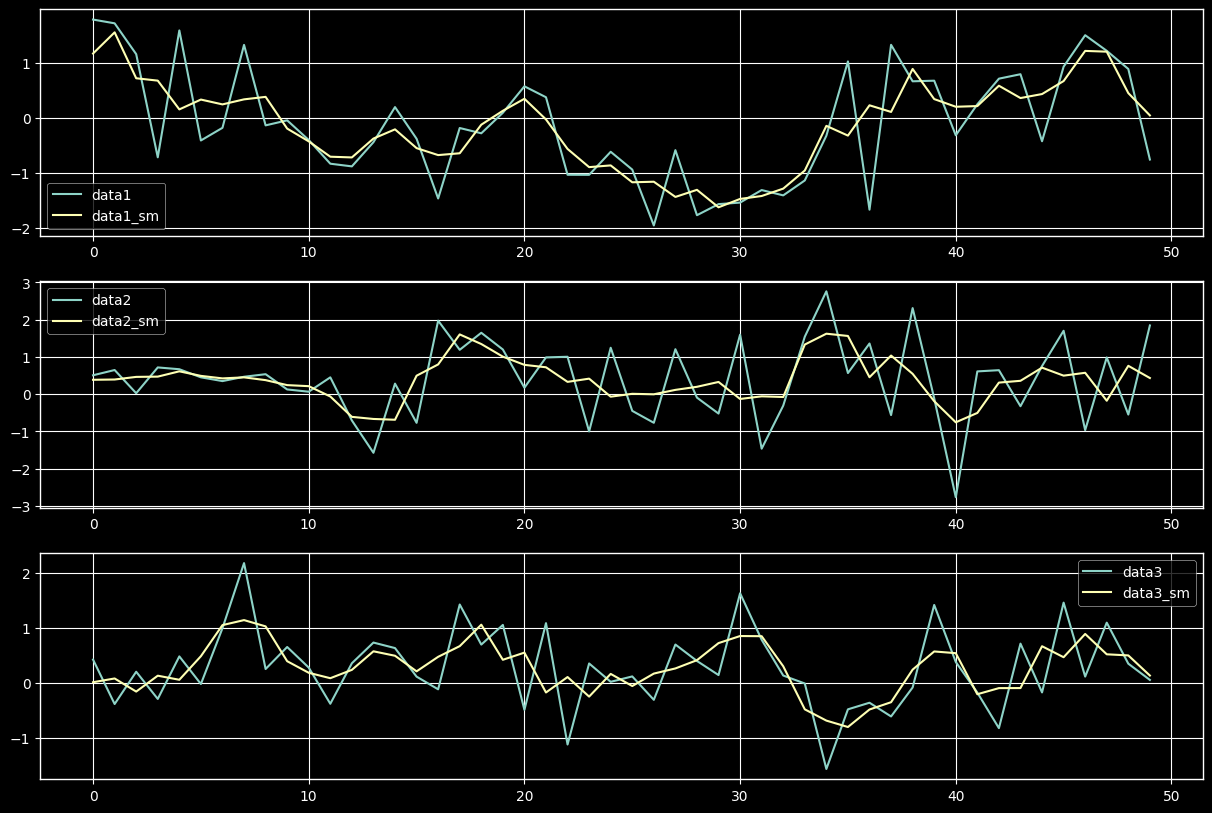

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

ax[0].plot(df['data1'], label='data1')
ax[0].plot(df['data1_sm'], label='data1_sm')
ax[0].legend()

ax[1].plot(df['data2'], label='data2')
ax[1].plot(df['data2_sm'], label='data2_sm')
ax[1].legend()

ax[2].plot(df['data3'], label='data3')
ax[2].plot(df['data3_sm'], label='data3_sm')
ax[2].legend()

plt.show()
